# Solve rocket equation with drag force

In [1]:
# Import all relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set parameters of packages
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm, amsmath, siunitx}'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 10

In [2]:
# Adjustable parameters
P_0_bar = 8 # bar, rocket pressure in bars
m_w = 0.5 # kg, water mass

# Calculate important parameters
rho_w = 1000.0 # kg/m^3, water density
m_f = 0.05 # kg, bottle mass
g = 9.81 # m/s^2, gravitational acceleration
r = 0.045 # m, booster diameter
P_0 = P_0_bar*1e5 # Pa, rocket pressure in Pascals
R = 0.04 # m, radius of bottle
A = R**2*np.pi # m^2, cross-sectional area of bottle in propagation direction
rho = 1.15 # kg/m^3, air density
tau = m_w/(r**2*np.pi*np.sqrt(P_0*rho_w)) # s, total boost time
v_w = np.sqrt(P_0/rho_w) # m/s, constant water ejection velocity
m_0 = m_f + m_w # kg, total mass of water rocket at start
b = m_w/tau # kg/s, water ejection rate
C_d = 0.57 # Air resistance coefficient
gamma = C_d*rho*A # kg/m, scaled air resistance coefficient

In [3]:
def f(t, h, v):
    return v

def p(t, h, v):
    if t < tau:
        t_smaller_tau = 1
        t_bigger_tau = 0
    else:
        t_smaller_tau = 0
        t_bigger_tau = 1
    return ((b*v_w)/(m_0-b*t))*t_smaller_tau - (gamma/(m_0-b*t*t_smaller_tau-b*tau*t_bigger_tau))*v**2 - g

def solve_rocket_equation(h0, v0, t_start, t_end, num_steps):
    h = np.zeros(num_steps)
    v = np.zeros(num_steps)
    t = np.linspace(t_start, t_end, num_steps)
    h[0] = h0
    v[0] = v0
    dt = (t_end - t_start) / num_steps

    for i in range(num_steps - 1):
        k1h = f(t[i], h[i], v[i])
        k1v = p(t[i], h[i], v[i])
        k2h = f(t[i] + dt/2, h[i] + (dt/2) * k1h, v[i] + (dt/2) * k1v)
        k2v = p(t[i] + dt/2, h[i] + (dt/2) * k1h, v[i] + (dt/2) * k1v)
        k3h = f(t[i] + dt/2, h[i] + (dt/2) * k2h, v[i] + (dt/2) * k2v)
        k3v = p(t[i] + dt/2, h[i] + (dt/2) * k2h, v[i] + (dt/2) * k2v)
        k4h = f(t[i] + dt, h[i] + dt * k3h, v[i] + dt * k3v)
        k4v = p(t[i] + dt, h[i] + dt * k3h, v[i] + dt * k3v)
        h[i+1] = h[i] + (dt/6) * (k1h + 2*k2h + 2*k3h + k4h)
        v[i+1] = v[i] + (dt/6) * (k1v + 2*k2v + 2*k3v + k4v)

    return t, h, v

C:\Users\zahnd\AppData\Local\Temp\ipykernel_35408\3272357736.py:11: RuntimeWarning: overflow encountered in double_scalars
  return ((b*v_w)/(m_0-b*t))*t_smaller_tau - (gamma/(m_0-b*t*t_smaller_tau-b*tau*t_bigger_tau))*v**2 - g


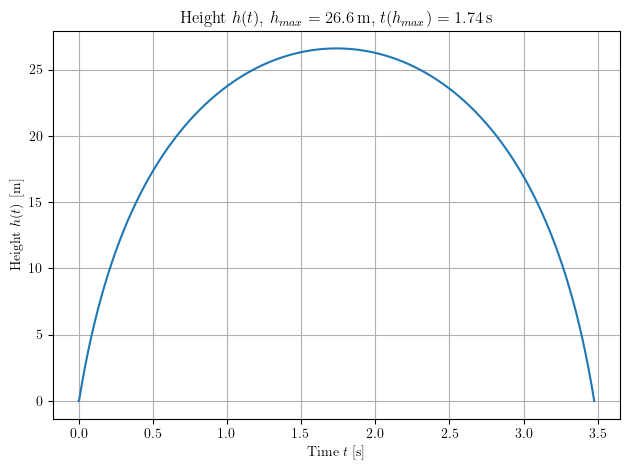

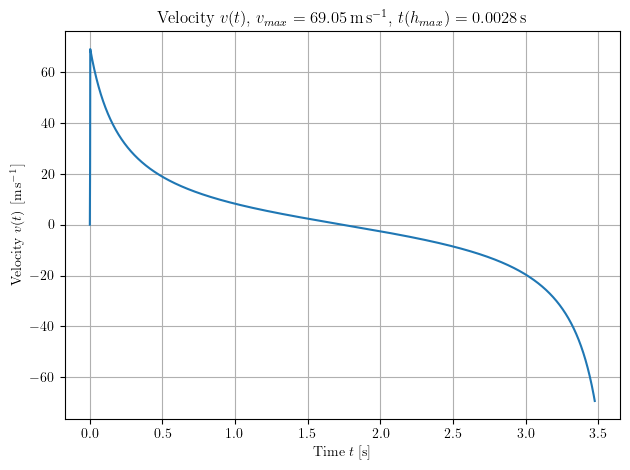

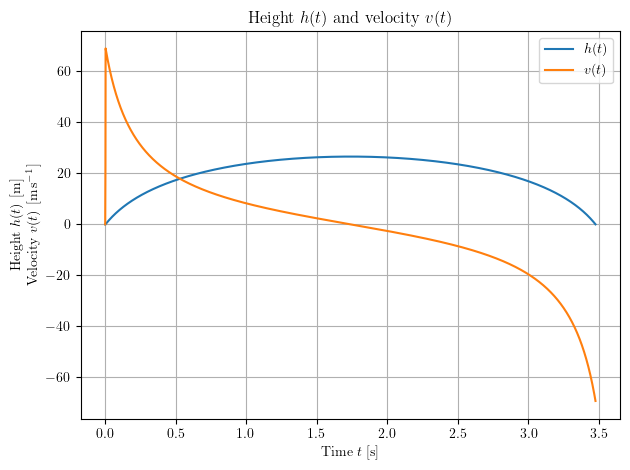

In [7]:
h0 = 0.0  # initial value of h
v0 = 0.0  # initial value of v
t_start = 0.0  # starting time
t_end = 5  # ending time
num_steps = 100000  # number of time steps

t, h, v = solve_rocket_equation(h0, v0, t_start, t_end, num_steps)

# Find maximal height and time at maximal height
h_max = np.max(h)
idx_h_max = np.argmax(h)
t_h_max = t[idx_h_max]
h_max = round(h_max, 2)
t_h_max = round(t_h_max, 2)

# Find maximal velocity and time at maximal velocity
v_max = np.max(v)
idx_v_max = np.argmax(v)
t_v_max = t[idx_v_max]
v_max = round(v_max, 2)
t_v_max = round(t_v_max, 4)

# Cut h, v and t arrays to suitable length
idx_h_neg = np.where(h < 0)
idx_trunc_after = int(np.min(idx_h_neg))
h = h[:idx_trunc_after]
v = v[:idx_trunc_after]
t = t[:idx_trunc_after]

# Plot the results
plt.title('Height $h(t)$, $h_{max} = \\SI{%s}{\meter}$, $t(h_{max}) = \\SI{%s}{\second}$' %(h_max, t_h_max))
plt.plot(t, h, label='$h(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Height $h(t)$ $[\\si{\meter}]$')
plt.grid(True)
plt.tight_layout()
plt.savefig('h(t)_with_drag.pdf')
plt.show()


plt.title('Velocity $v(t)$, $v_{max} = \\SI{%s}{\meter\per\second}$, $t(h_{max}) = \\SI{%s}{\second}$' %(v_max, t_v_max))
plt.plot(t, v, label='$v(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Velocity $v(t)$ $[\\si{\meter\per\second}]$')
plt.grid(True)
plt.tight_layout()
plt.savefig('v(t)_with_drag.pdf')
plt.show()

plt.title('Height $h(t)$ and velocity $v(t)$')
plt.plot(t, h, label='$h(t)$')
plt.plot(t, v, label='$v(t)$')
plt.xlabel('Time $t$ $[\\si{\second}]$')
plt.ylabel('Height $h(t)$ $[\\si{\meter}]$\nVelocity $v(t)$ $[\\si{\meter\per\second}]$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('h(t)_v(t)_with_drag.pdf')
plt.show()